# RNGD에서 번역 LLM 실행하기 

- 환경 탐지 (GPU, NPU-FuriosaAI RNGD)

- 번역, 모니터링 실행

In [2]:
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/dudaji/Jun/llm-rag-chatbot/config/config_gpu_translate.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']
Device Config: {'type': 'GPU', 'model': 'A100', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


In [3]:

# Test data
test_input = "최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다."
test_lang = "Korean"
ref_text = "最新のAI技術を活用して顧客のニーズをより効果的に予測し、個別化されたサービスを提供できるプラットフォームを開発中です"
target_lang = "Japanese"

# test_input = "最新のAI技術を活用して顧客のニーズをより効果的に予測し、個別化されたサービスを提供できるプラットフォームを開発中です"
# test_lang = "Japanese"
# ref_text = "최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다."
# target_lang = "Korean"
# test_input = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
# ref_text = "The value of the NPU is demonstrated not only through its theoretical performance but also by metrics that are applicable in real-world service environments."

# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)
    
    
# Translation
try:
    start_time = time()
    translated_text = translate_text(test_input, source_language=test_lang, target_language=target_lang)
    elapsed_time = time() - start_time
    print(f"Original: {test_input}")
    print(f"Translated text: {translated_text}")
except RuntimeError as e:
    print(f"Translation failed: {e}")
    translated_text = None
    elapsed_time = 0.0

2025-01-03 00:03:02,555 - ERROR - Failed to detect NPUs: [Errno 2] No such file or directory: 'furiosa-smi'
2025-01-03 00:03:02,556 - INFO - Translation environment detected: GPU. Using GPU for translations.
2025-01-03 00:03:08,010 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"


Original: 최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다.
Translated text: 最新のAI技術を利用して、顧客の要求をより効果的に予測し、個別のサービスを提供できるプラットフォームを作成中です。


## Evaluation 

- load_config에서 지정한 것들 고려

- BERT score는 GPU에서 실행하도록 되어있음. 
    - 지금은 NPU인 경우 계산하지 못하는 상태 
    - NPU에서 encoding model 잘 이용하면 계산할 수 있을 것 같음 (기존 bertscore 라이브러리 벤치마킹 필요)

In [4]:
# Evaluation
metrics = evaluate_translation(translated_text, ref_text, target_lang, 
                               elapsed_time, all_configs["active_metrics"])
print("Metrics:", metrics)

/home/elicer/anaconda3/envs/jun-rngd/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Error calculating BERTScore: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx
Metrics: {'BLEU': 0.1059, 'METEOR': 0.4145, 'tps': 13.760462211243002, 'BERTScore': 0.0}


## Run Translation during Monitoring power

- monitor power consumption 데코레이터 사용 

In [8]:
import os
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/dudaji/Jun/llm-rag-chatbot/main/config_npu.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']
Device Config: {'type': 'npu:0:*', 'model': 'RNGD', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


In [1]:
import os
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/dudaji/Jun/llm-rag-chatbot/main/config_gpu_translate.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

# Set ENABLE_MONITORING=true in the environment to enable monitoring
if "power_consumption" in all_configs["active_metrics"]:
    os.environ["ENABLE_MONITORING"] = "true"
else:
    os.environ["ENABLE_MONITORING"] = "false"

# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)


input_text = "이론적인 성능뿐 아니라 실제 서비스 환경에서 검증 가능한 지표를 바탕으로 NPU의 가치를 입증합니다."
test_lang = "Korean"
target_lang = "English"
translation_result = translate_text(input_text, source_language=test_lang, target_language=target_lang)

print("Translation:", translation_result["result"] if isinstance(translation_result, dict) else translation_result)

if isinstance(translation_result, dict):
    print("Elapsed Time:", translation_result["elapsed_time"])
    print("Total Power (Absolute):", translation_result["total_power"]["absolute"])
    print("Relative Power by GPU:", translation_result["total_power"]["relative"])



2025-01-02 22:28:26,756 - ERROR - Failed to detect NPUs: [Errno 2] No such file or directory: 'furiosa-smi'
2025-01-02 22:28:26,757 - INFO - Translation environment detected: GPU. Using GPU for translations.


Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']
Device Config: {'type': 'GPU', 'model': 'A100', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


2025-01-02 22:28:27,231 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-02 22:28:27,426 - INFO - Total Power Consumption (Absolute): 616.5500000000001 W
2025-01-02 22:28:27,427 - INFO - Power Data (Relative by Device): {'cuda:0': 0.11123185467520881, 'cuda:1': 0.1335658097477901, 'cuda:2': 0.4031627605222609, 'cuda:3': 0.10091638958721919, 'cuda:4': 0.11517314086448788, 'cuda:5': 0.135950044603033}
2025-01-02 22:28:27,428 - INFO - Power Data for cuda:0: [22.86, 22.86, 22.86]
2025-01-02 22:28:27,430 - INFO - Timing Data for cuda:0: [0.02, 0.25, 0.46]
2025-01-02 22:28:27,430 - INFO - Power Data for cuda:1: [27.45, 27.45, 27.45]
2025-01-02 22:28:27,431 - INFO - Timing Data for cuda:1: [0.04, 0.26, 0.48]
2025-01-02 22:28:27,432 - INFO - Power Data for cuda:2: [73.44, 81.16, 93.97]
2025-01-02 22:28:27,432 - INFO - Timing Data for cuda:2: [0.06, 0.28, 0.5]
2025-01-02 22:28:27,433 - INFO - Power Data for cuda:3: [20.74, 20.74, 20.74]
2025-01-02 22:28:

Translation: Theoretical performance is demonstrated along with a verified metric in actual service environment, proving the value of NPU.


In [1]:
import os
from time import time
from translate.one_trans import initialize_translation_environment, translate_text, batch_translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/dudaji/Jun/llm-rag-chatbot/main/config_gpu_translate.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

# Set ENABLE_MONITORING=true in the environment to enable monitoring
if "power_consumption" in all_configs["active_metrics"]:
    os.environ["ENABLE_MONITORING"] = "true"
else:
    os.environ["ENABLE_MONITORING"] = "false"
    
# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)
    
input_texts = [
    "이론적인 성능뿐 아니라 실제 서비스 환경에서 검증 가능한 지표를 바탕으로 NPU의 가치를 입증합니다.",
    "최신 AI 기술로 고객의 요구를 예측하고 개인화된 서비스를 제공합니다.",
    "AI 기술은 의료, 금융, 제조업 등 다양한 산업에서 혁신을 이끌고 있습니다.",
    "효율적인 전력 사용과 높은 성능을 겸비한 Furiosa NPU는 차세대 AI 환경을 선도합니다.",
    "멀티모달 AI 모델은 이미지와 텍스트를 결합하여 더 정교한 분석을 제공합니다.",
]
os.environ["ENABLE_MONITORING"] = "false"

# Perform batch translation
batch_results = batch_translate_text(input_texts)

# Log or process results
for i, result in enumerate(batch_results):
    print(f"Translation {i + 1}: {result}")

2025-01-03 09:18:51,709 - ERROR - Failed to detect NPUs: [Errno 2] No such file or directory: 'furiosa-smi'
2025-01-03 09:18:51,710 - INFO - Translation environment detected: GPU. Using GPU for translations.


Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']
Device Config: {'type': 'GPU', 'model': 'A100', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


2025-01-03 09:18:52,248 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:18:52,695 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:18:53,151 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:18:53,632 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:18:54,031 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"


Translation 1: translations


In [2]:
batch_results

{'translations': ['In addition to theoretical performance, it proves the value of NPU based on a measurable indicator that can be verified in actual service environments.',
  "We utilize the latest AI technology to predict our customers' needs and provide personalized services accordingly.",
  'Artificial intelligence technology is driving innovation across various industries such as healthcare, finance, and manufacturing.',
  'Our Furiosa NPU combines efficient power usage with high performance, leading the next generation of AI environments.',
  'This multi-modal AI model combines images and texts to provide a more refined analysis.']}

In [3]:
batch_results['translations']

['In addition to theoretical performance, it proves the value of NPU based on a measurable indicator that can be verified in actual service environments.',
 "We utilize the latest AI technology to predict our customers' needs and provide personalized services accordingly.",
 'Artificial intelligence technology is driving innovation across various industries such as healthcare, finance, and manufacturing.',
 'Our Furiosa NPU combines efficient power usage with high performance, leading the next generation of AI environments.',
 'This multi-modal AI model combines images and texts to provide a more refined analysis.']

In [4]:
import matplotlib.pyplot as plt

# Plot power consumption trends with unique colors for each device
for ii, (timing, power) in enumerate(zip(batch_results['timing_data'].values(), batch_results['power_data'].values())):
    plt.plot(timing, power, marker='.', linestyle='-', label=f"Device {ii}")

# Customize the plot
plt.title("Power Consumption Trends")
plt.xlabel("Time (seconds)")
plt.ylabel("Power Consumption (Watts)")
plt.grid(True)
plt.legend(title="Devices")
plt.show()

KeyError: 'timing_data'

# 벤치마킹 데이터셋에 대해서 번역 실행 

In [5]:
# Load the CSV file
# 텍스트 파일 로더
def load_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    return [line.strip() for line in lines]

# 데이터 위치 
data_dir = "/home/dudaji/Jun/llm-rag-chatbot/data/flores/"

data_eng = load_text_file(f"{data_dir}/devtest.eng_Latn")
data_kor = load_text_file(f"{data_dir}/devtest.kor_Hang")
data_jpn = load_text_file(f"{data_dir}/devtest.jpn_Jpan")

print(data_eng[0])
print(data_kor[0])
print(data_jpn[0])

"We now have 4-month-old mice that are non-diabetic that used to be diabetic," he added.
"그는 ""현재 4개월 된 당뇨병에서 치료된 생쥐가 있다""고 덧붙였다."
「我々が飼っている生後4か月のマウスはかつて糖尿病でしたが現在は糖尿病ではない、」と彼は付け加えました。


In [6]:
import os
from time import time
from translate.one_trans import initialize_translation_environment, translate_text, batch_translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation
import pandas as pd

# Example usage
config_path = "/home/dudaji/Jun/llm-rag-chatbot/main/config_gpu_translate.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

# Set ENABLE_MONITORING=true in the environment to enable monitoring
if "power_consumption" in all_configs["active_metrics"]:
    os.environ["ENABLE_MONITORING"] = "true"
else:
    os.environ["ENABLE_MONITORING"] = "false"
    
# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)
    
    
# Perform batch translation
os.environ["ENABLE_MONITORING"] = "false"
batch_results = batch_translate_text(data_kor[:100], source_language="Korean", target_language="English")
print('translation done')

2025-01-03 09:20:47,987 - ERROR - Failed to detect NPUs: [Errno 2] No such file or directory: 'furiosa-smi'
2025-01-03 09:20:47,990 - INFO - Translation environment detected: GPU. Using GPU for translations.


Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']
Device Config: {'type': 'GPU', 'model': 'A100', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


2025-01-03 09:20:48,440 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:49,280 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:49,819 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:50,640 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:51,312 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:51,936 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:52,333 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:52,905 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:53,365 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"
2025-01-03 09:20:53,861 - INFO - HTTP Request:

translation done


- Check the power usage 

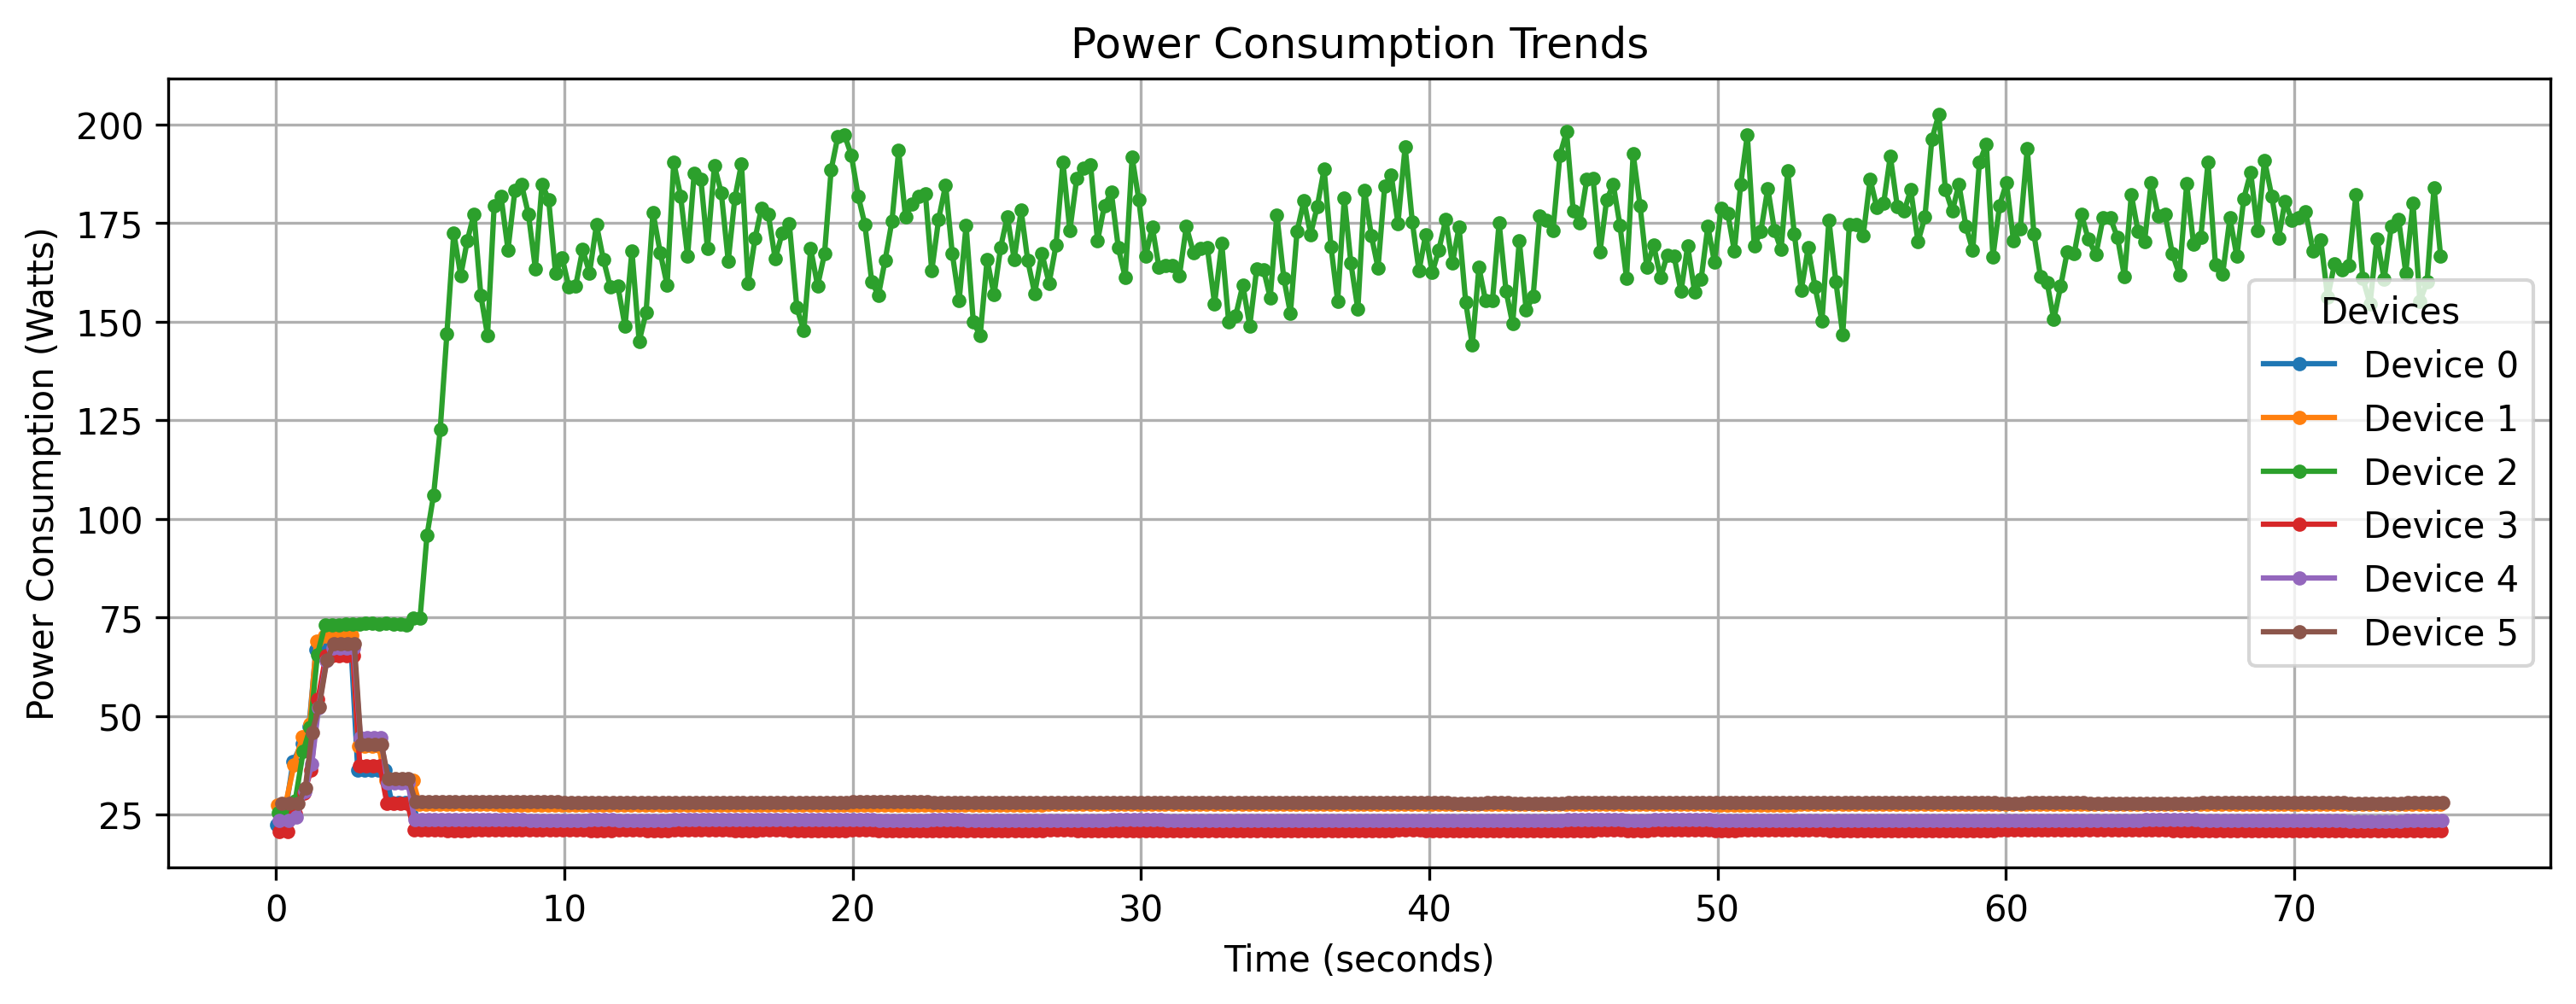

In [4]:
import matplotlib.pyplot as plt

# Plot power consumption trends with unique colors for each device
plt.figure(figsize=(12,4), dpi=300)
for ii, (timing, power) in enumerate(zip(batch_results['timing_data'].values(), batch_results['power_data'].values())):
    plt.plot(timing, power, marker='.', linestyle='-', label=f"Device {ii}")

# Customize the plot
plt.title("Power Consumption Trends")
plt.xlabel("Time (seconds)")
plt.ylabel("Power Consumption (Watts)")
plt.grid(True)
plt.legend(title="Devices")
plt.show()

In [5]:
batch_results['translations']

['He added that he has a mouse that was cured of diabetes four months ago.',
 "Dr. Ehud Ur, a professor of medicine at Dalhousie University in Halifax, Nova Scotia and president of the Canadian Diabetes Association's Clinical Science Department, has warned that this study is still in its early stages.",
 'Like other experts, he is skeptical about the treatment of diabetes and notes that these results are irrelevant to type 1 diabetes patients.',
 "On Monday, Sara Danius, the Permanent Secretary of the Swedish Academy's Literature Committee and Nobel Prize laureate, announced publicly that they had given up trying to contact Bob Dylan directly with the news of his 2016 Nobel Prize in Literature.",
 '"Mr Danius says, \'We are doing nothing at the moment. I have called his closest collaborator and received a very kind response. For now, that is sufficient.\'"',
 'The CEO of Ring, Jamie Siminoff, started the company after being unable to hear the doorbell from his shop that was located in 